In [7]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Prapti\OneDrive\Desktop\DSBDA labs\datasets\student performance.csv")

In [9]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# since here there is no null values . but if we wish to handle missing values we use code : 
#Fix missing values by replacing with the column mean
#df['mathscore'].fillna(df['mathscore'].mean(), inplace=True)
#df['readingscore'].fillna(df['readingscore'].mean(), inplace=True)
#df['writingscore'].fillna(df['writingscore'].mean(), inplace=True)


In [13]:
# handling inconsistencies 
print(df['gender'].unique())

['female' 'male']


In [ ]:
#df['gender']=df['gender'].str.strip().str.lower()

In [17]:
print(df['race/ethnicity'].value_counts())

race/ethnicity
group C    323
group D    257
group B    198
group E    143
group A     79
Name: count, dtype: int64


In [29]:
q1=df['math score'].quantile(0.25)
q3=df['math score'].quantile(0.75)
q1,q3

(58.0, 79.25)

In [31]:
IQR=q3-q1
IQR

21.25

In [33]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
lower_limit,upper_limit

(26.125, 111.125)

In [37]:
df[(df['math score']<lower_limit)|(df['math score']>upper_limit)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
72,female,group C,some high school,standard,none,23,33,33
228,male,group C,high school,free/reduced,none,20,25,15
480,female,group C,high school,standard,none,21,30,26
492,female,group D,some high school,standard,none,25,33,32
586,female,group D,high school,free/reduced,none,15,39,40
693,female,group C,high school,free/reduced,none,24,48,46


In [39]:
df[(df['math score']>lower_limit)&(df['math score']<upper_limit)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [41]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [43]:
df['zscore']=(df['math score'] - df['math score'].mean())/df['math score'].std()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,zscore
0,female,group D,some college,standard,completed,59,70,78,-0.577698
1,male,group D,associate's degree,standard,none,96,93,87,1.848501
2,female,group D,some college,free/reduced,none,57,76,77,-0.708843
3,male,group B,some college,free/reduced,none,70,70,63,0.143605
4,female,group D,associate's degree,standard,none,83,85,86,0.996053
...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,0.602615
996,male,group C,some college,standard,none,80,66,66,0.799334
997,female,group A,high school,standard,completed,67,86,86,-0.053114
998,male,group E,high school,standard,none,80,72,62,0.799334


In [55]:
outliers = df[df['zscore'].abs() > 3]
print(outliers)

     gender race/ethnicity parental level of education         lunch  \
228    male        group C                 high school  free/reduced   
480  female        group C                 high school      standard   
586  female        group D                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  \
228                    none          20             25             15   
480                    none          21             30             26   
586                    none          15             39             40   

       zscore  
228 -3.135042  
480 -3.069469  
586 -3.462906  


<Axes: ylabel='math score'>

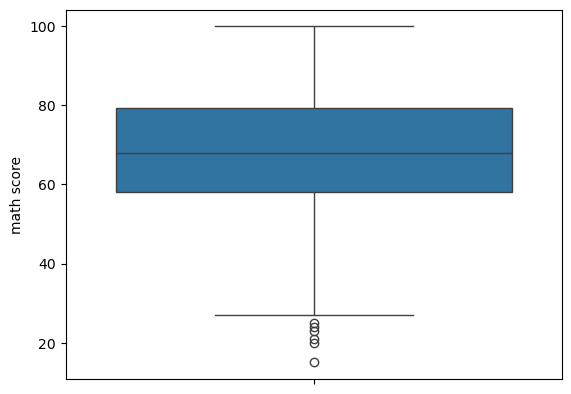

In [51]:
import seaborn as sns
sns.boxplot(df['math score'])

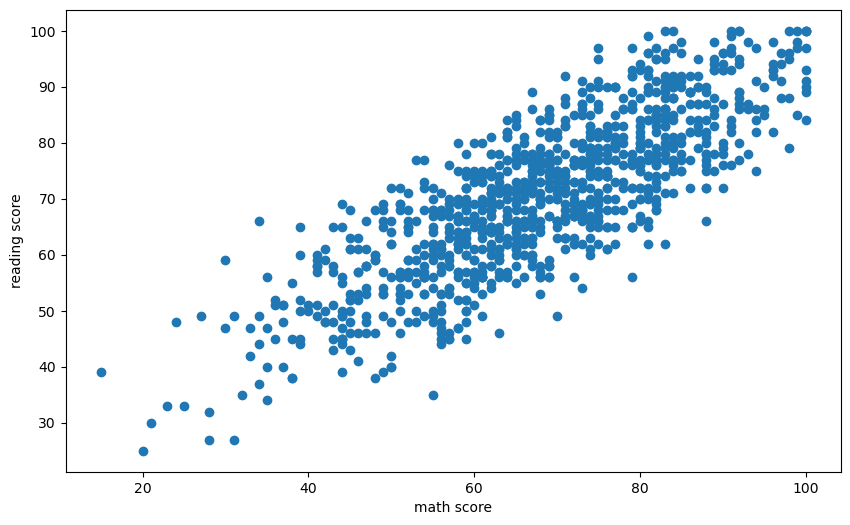

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['math score'], df['reading score'])
ax.set_xlabel('math score')
ax.set_ylabel('reading score')
plt.show()
